In [3]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x, n):
    a = x.max() - x.min()
    return np.sqrt(2/a) * np.sin(n*np.pi*x/a)

def p_per_psi(x, n):
    a = x.max() - x.min()
    return 1/1j * n*np.pi/a * np.sqrt(2/a) * np.cos(n*x*np.pi/a)

def psquare_per_psi(x, n):
    a = x.max() - x.min()
    return (1/1j)**2 * (-1)*(n/a * np.pi)**2 * np.sqrt(2/a) * np.sin(n*x*np.pi/a)

In [4]:
x = np.linspace(0,1, 1000, dtype=np.float64)
plt.rc('figure', figsize=(12,8))

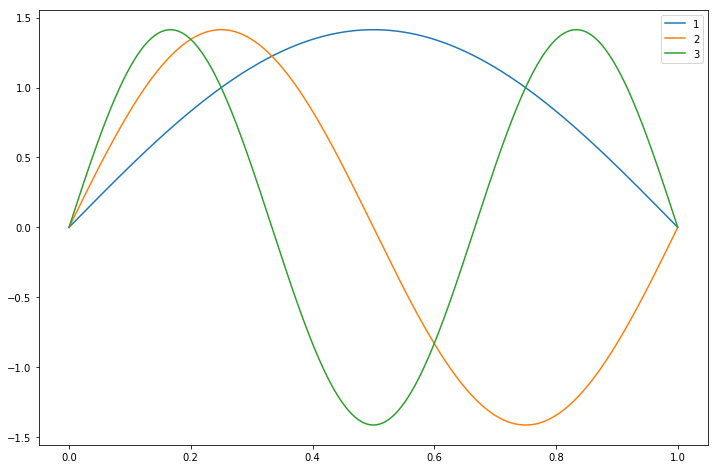

In [5]:
for n in range(1,4):
    plt.plot(x, psi(x, n), label=n)
    #plt.plot(x, -psi(x, n), label="-{}".format(n))
plt.legend()

In [6]:
stati = np.arange(1,13,1)
#plt.plot(stati, [(psi(x, n)**2).mean() for n in stati])
#plt.ylim(0,1.1)

In [7]:
len(stati)

12

In [8]:
np.array([(psi(x, n)**2).mean() for n in stati]).std()
# Beh, sono normalizzati e tutti uguali

4.5324665183683945e-17

0.0

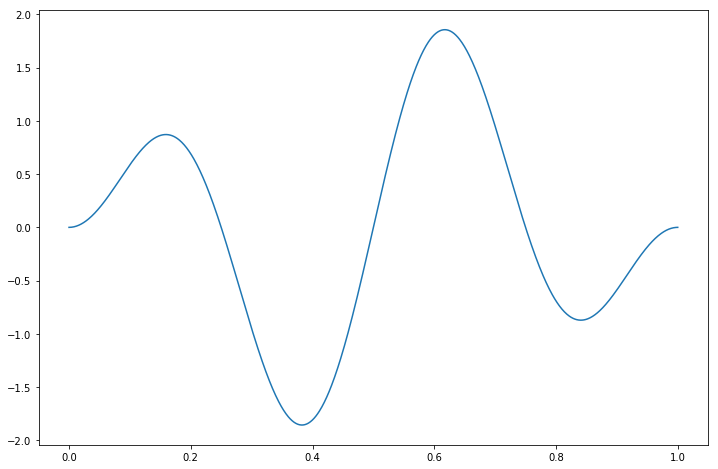

In [30]:
plt.plot (x, psi(x, 1) * psi(x, 4))
(psi(x, 1) * psi(x, 4)).mean()
# Sono ortogonali?

In [10]:
(psi(x, 1)**2).mean()

0.9990000000000002

In [11]:
def x_mu(x, n):
    return (psi(x, n) * x * psi(x, n)).mean()
#def x_sigma(x, n):
#    return (psi(x, n) * x * psi(x, n)).std()

def x_sigma(x, n):
    return np.sqrt((psi(x,n)*(x**2)*psi(x,n)).mean() - x_mu(x,n)**2)

<ErrorbarContainer object of 3 artists>

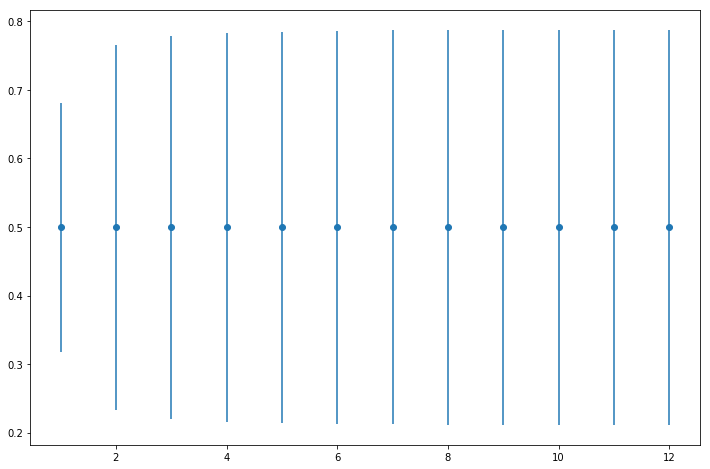

In [12]:
plt.errorbar(stati, [x_mu(x, n) for n in stati], yerr=[x_sigma(x, n) for n in stati], marker='o', linestyle='')

/home/peppe/conda/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


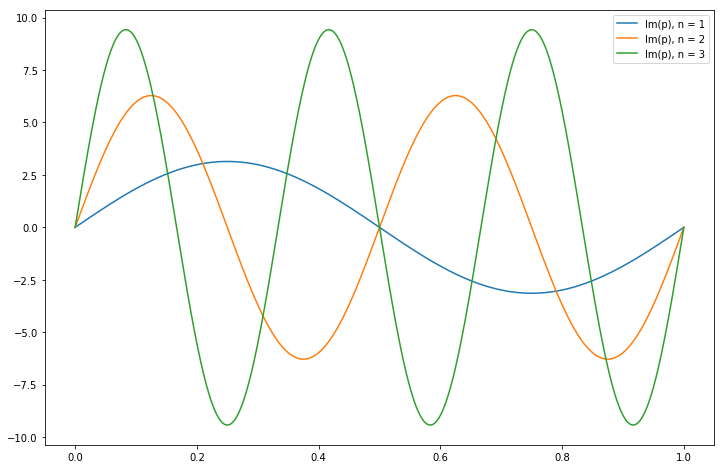

In [13]:
for n in range(1,4):
    plt.plot(x, 1j*(psi(x, n) * p_per_psi(x, n)), label = "Im(p), n = {}".format(n))
#plt.plot(x, psi(x, 1) * psquare_per_psi(x, 1), label= "p**2 medio")
plt.legend()

In [14]:
def p_mu(x, n): 
    return (psi(x, n) * p_per_psi(x, n)).mean()

#def p_sigma(x, n): 
#    return (psi(x, n) * p_per_psi(x, n)).std()

def p_sigma(x, n):
    return np.sqrt(((psi(x, n) * psquare_per_psi(x, n)).mean()) - p_mu(x, n)**2)

<ErrorbarContainer object of 3 artists>

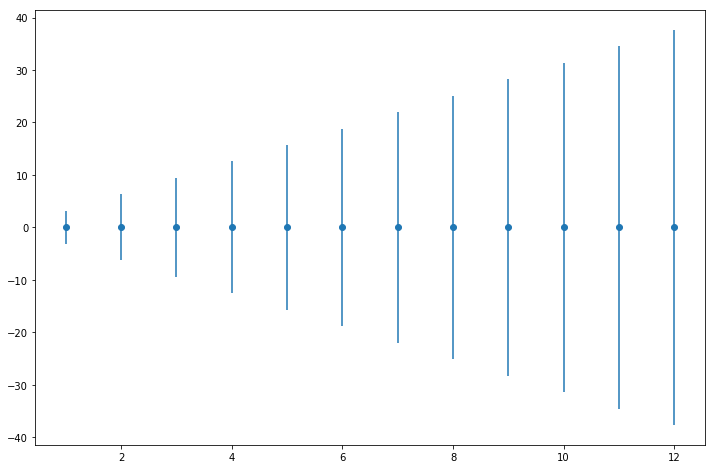

In [15]:
plt.errorbar(stati, [p_mu(x, n) for n in stati], yerr=[p_sigma(x, n) for n in stati], marker='o', linestyle='')

[ 0.56946017+0.j  1.67156844+0.j  2.62879592+0.j  3.55999519+0.j
  4.48142101+0.j  5.39808054+0.j  6.31205067+0.j  7.22435218+0.j
  8.13554645+0.j  9.04596808+0.j  9.95582903+0.j 10.86527016+0.j]
[ 3.14002146+0.j  6.28004293+0.j  9.42006439+0.j 12.56008586+0.j
 15.70010732+0.j 18.84012879+0.j 21.98015025+0.j 25.12017171+0.j
 28.26019318+0.j 31.40021464+0.j 34.54023611+0.j 37.68025757+0.j]
[0.1813555  0.2661715  0.27906348 0.28343717 0.28543888 0.28652036
 0.2871705  0.28759167 0.28788007 0.28808619 0.28823859 0.28835446]


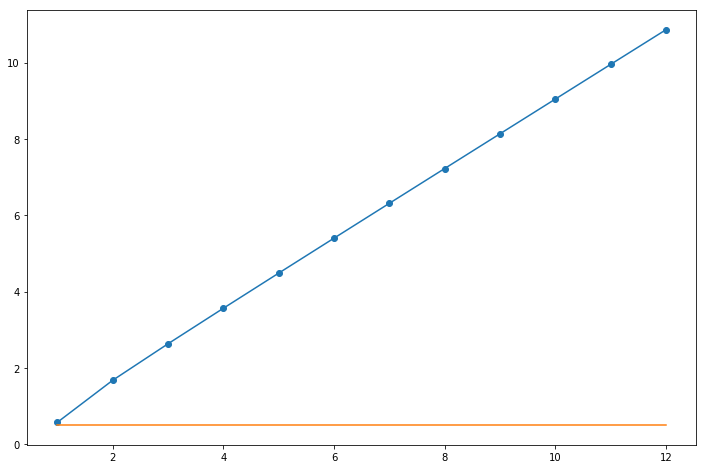

In [49]:
volumi = np.array([p_sigma(x, n) for n in stati]) * np.array([x_sigma(x, n) for n in stati])
plt.plot(stati, np.abs(VOLUMI), marker='o')
plt.plot(stati, np.repeat(1/2, len(stati)))

print (volumi)
print (np.array([p_sigma(x, n) for n in stati]))
print (np.array([x_sigma(x, n) for n in stati]))

(4.929867398344142+0j) 4.934802200544679
(-0.004934802200536659+0j)


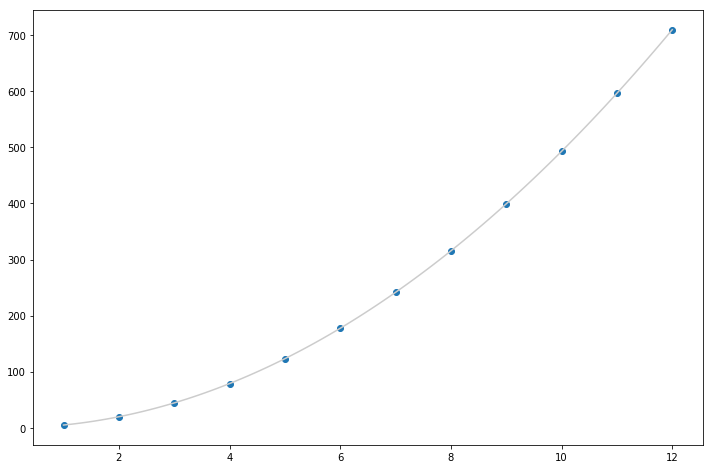

In [48]:
energie = np.array([(psi(x,n)*psquare_per_psi(x,n)/2).mean() for n in stati])

#reg = stats.linregress(stati, energie)
#plt.plot(stati, reg.intercept + stati*reg.slope, '--')

plt.plot(stati, energie, marker='o', linestyle='') 
blabla = np.linspace(np.array(stati).min(), np.array(stati).max(), 100)
poly = np.polyfit(stati, energie, 2)
plt.plot(blabla, np.poly1d(poly)(blabla), '-', color=".8")
print(poly[0], np.pi**2 /2)
print(poly[0] - np.pi**2 /2)

In [32]:
np.diff(energie)

array([ 14.7896022 +0.j,  24.64933699+0.j,  34.50907179+0.j,
        44.36880659+0.j,  54.22854138+0.j,  64.08827618+0.j,
        73.94801098+0.j,  83.80774577+0.j,  93.66748057+0.j,
       103.52721537+0.j, 113.38695016+0.j])

In [19]:
np.poly1d(poly)(9)

(399.3192592658752+0j)

In [20]:
poly

array([ 4.92986740e+00+0.j, -7.88774443e-14+0.j,  3.50437824e-13+0.j])